# Lesson 14b: Cluster Analysis with Cathegorical Data

Cluster analysis is unsupervised learning. We have inputs that are modelled, we have outputs, but we do not have predictive power so that to describe correct values in the result.

We will use K-Means method to find clusters; K - refers to the number of clusters that we need, and, in the same time, it is the number of iterations which our model has to perform to find centroids (centers of clusters) correctly.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv("3.01.Country_clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Map the data

In [3]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map({"English":0, "French":1, "German":2})

## Select the features

In [4]:
x = data_mapped.iloc[:,1:3]

# The function DataFrame.iloc[row idexes, column indexes] slices the table and chooses specific rows and cols.
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [5]:
kmeans = KMeans(2)   # Here I specify how many clusters I want.
kmeans.fit(x)

KMeans(n_clusters=2)

In [6]:
identified_clusters = kmeans.fit_predict(x)   # This function returns the cluster predictions in an array.
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [7]:
# So we have got 5 countries in the cluster 0, and 1 country in the cluster 1.

In [8]:
data_with_clusters = data.copy()
data_with_clusters["Clusters"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


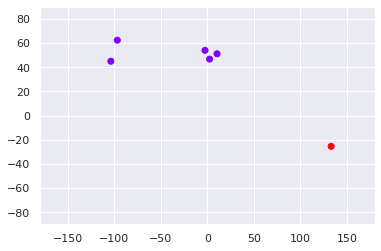

In [9]:
plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], 
            c = data_with_clusters["Clusters"], cmap = "rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Criterion for selection of the number of cluster

We need the elbow method (it minimizes the distance between the points within the cluster and maximizes the distance between the clusters). The wcss method is to measure the distance between the points within a cluster and we want to find wcss as small as possible to find low number of clusters to be able to interpret them.

### WCSS method

In [10]:
kmeans.inertia_

13205.758119999999

In [11]:
# To plot the elbow we need to find wcss for all numbers of clusters: 1, 2, 3, 4, 5, 6. We do it in a loop.

In [13]:
wcss = []   # Declare an empty list.

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

<function matplotlib.pyplot.show(close=None, block=None)>

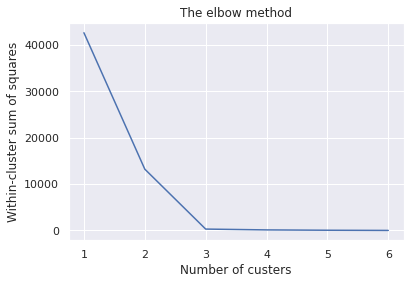

In [14]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title("The elbow method")
plt.xlabel("Number of custers")
plt.ylabel("Within-cluster sum of squares")

plt.show

In [ ]:
# We see from the elbow method that the optimal numer of clusters is 3, because it is on the edge.